# WIKIPEDIA: Metin Ön işleme ve Görselleştirme

In [2]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [46]:
df = pd.read_csv("wiki_data.csv", index_col = False)

In [47]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [48]:
df

text
0      Anovo\n\nAnovo (formerly A Novo) is a computer...
1      Battery indicator\n\nA battery indicator (also...
2      Bob Pease\n\nRobert Allen Pease (August 22, 19...
3      CAVNET\n\nCAVNET was a secure military forum w...
4      CLidar\n\nThe CLidar is a scientific instrumen...
...                                                  ...
10854  Soundcast\n\nSoundcast LLC is a privately fund...
10855  Spectrum analyzer\n\nA spectrum analyzer measu...
10856  Telepresence technology\n\nTelepresence techno...
10857  Trans-Pacific Profiler Network\n\nThe Trans-Pa...
10858  Transfer case\n\nA transfer case is a part of ...

[10859 rows x 1 columns]

## Görev 1: Metin Ön İşleme İşlemlerini Gerçekleştiriniz

### Adım 1: Metin ön işleme için clean_text adında fonksiyon oluşturunuz.
Bu fonksiyon; 
• Büyük küçük harf dönüşümü, 
• Noktalama işaretlerini çıkarma, 
• Numerik ifadeleri çıkarma işlemlerini gerçekleştirmeli.

In [16]:
def clean_text(dataframe, col_name):
    dataframe[col_name] = dataframe[col_name].str.lower()
    dataframe[col_name] = dataframe[col_name].str.replace("[^\w\s]","")
    dataframe[col_name] = dataframe[col_name].str.replace("\n","")
    dataframe[col_name] = dataframe[col_name].str.replace("\d", "")
    
    return dataframe

### Adım 2: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [17]:
df = clean_text(df, "text")
df

text
0      anovoanovo formerly a novo is a computer servi...
1      battery indicatora battery indicator also know...
2      bob peaserobert allen pease august  â â june  ...
3      cavnetcavnet was a secure military forum which...
4      clidarthe clidar is a scientific instrument us...
...                                                  ...
10854  soundcastsoundcast llc is a privately funded c...
10855  spectrum analyzera spectrum analyzer measures ...
10856  telepresence technologytelepresence technology...
10857  transpacific profiler networkthe transpacific ...
10858  transfer casea transfer case is a part of the ...

[10859 rows x 1 columns]

### Adım 3: Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

In [18]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def remove_stopwords(dataframe, col_name, language = "english"):
    sw = stopwords.words(language)
    dataframe[col_name] = dataframe[col_name].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    
    return dataframe

### Adım 4: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [20]:
df = remove_stopwords(df, "text")
df

text
0      anovoanovo formerly novo computer services com...
1      battery indicatora battery indicator also know...
2      bob peaserobert allen pease august â â june an...
3      cavnetcavnet secure military forum became oper...
4      clidarthe clidar scientific instrument used me...
...                                                  ...
10854  soundcastsoundcast llc privately funded compan...
10855  spectrum analyzera spectrum analyzer measures ...
10856  telepresence technologytelepresence technology...
10857  transpacific profiler networkthe transpacific ...
10858  transfer casea transfer case part drivetrain f...

[10859 rows x 1 columns]

### Adım 5: Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.

In [27]:
temp_df = pd.Series(" ".join(df["text"]).split()).value_counts()

drops = temp_df[temp_df < 2000]

df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

df["text"]

0        computer services company based public service...
1        also known device information usually state im...
2        â â circuit design technical designed several ...
3        became part allows access ground used us data ...
4        used lower light form used light device usuall...
                               ...                        
10854    company technologies commercial company system...
10855    signal frequency within frequency range use po...
10856    technology term used national technology infor...
10857    network usually system information data areas ...
10858    case part multiple vehicles case power means a...
Name: text, Length: 10859, dtype: object

### Adım 6: Metinleri tokenize edip sonuçları gözlemleyiniz.

In [28]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df["text"].apply(lambda x: TextBlob(x).words)

0        [computer, services, company, based, public, s...
1        [also, known, device, information, usually, st...
2        [â, â, circuit, design, technical, designed, s...
3        [became, part, allows, access, ground, used, u...
4        [used, lower, light, form, used, light, device...
                               ...                        
10854    [company, technologies, commercial, company, s...
10855    [signal, frequency, within, frequency, range, ...
10856    [technology, term, used, national, technology,...
10857    [network, usually, system, information, data, ...
10858    [case, part, multiple, vehicles, case, power, ...
Name: text, Length: 10859, dtype: object

### Adım 7: Lemmatization işlemi yapınız.

In [30]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df["text"]

0        computer service company based public service ...
1        also known device information usually state im...
2        â â circuit design technical designed several ...
3        became part allows access ground used u data d...
4        used lower light form used light device usuall...
                               ...                        
10854    company technology commercial company system a...
10855    signal frequency within frequency range use po...
10856    technology term used national technology infor...
10857    network usually system information data area n...
10858    case part multiple vehicle case power mean als...
Name: text, Length: 10859, dtype: object

## Görev 2: Veriyi Görselleştiriniz

### Adım 1: Metindeki terimlerin frekanslarını hesaplayınız.

In [33]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.columns = ["words", "tf"]
tf

words       tf
0     service  7794.00
1     company 13317.00
2    computer  4781.00
3       based  5533.00
4      public  3365.00
..        ...      ...
274      flow  2283.00
275   quality  2171.00
276     north  2024.00
277  formula_  2970.00
278  released  2253.00

[279 rows x 2 columns]

### Adım 2: Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

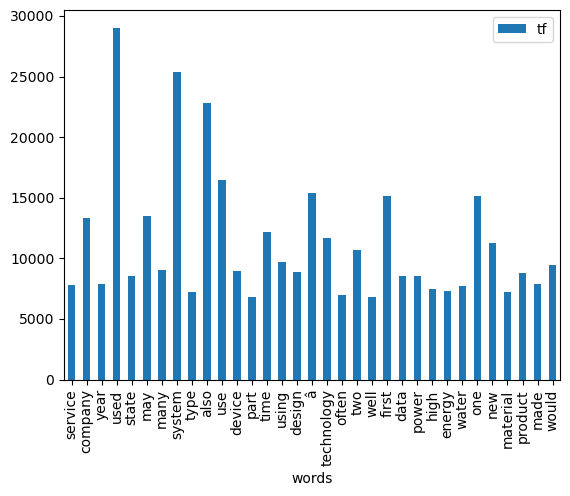

In [42]:
tf[tf["tf"] > 6500].plot.bar(x="words", y="tf")
plt.show()

### Adım 3: Kelimeleri WordCloud ile görselleştiriniz.

In [43]:
text = " ".join(i for i in df.text)
text

'computer service company based public service mobile four year company possible also known device information usually state important case electric may also many instead vehicle typically light may vehicle system may used operating state many electronic device mobile usually form state may signal user using generally user operating time system us provide state part system computer operation series may increase many le voltage across voltage many type system use possible type voltage across series used used used known size state use type used cost used â â circuit design technical designed several many production multiple include voltage science electrical engineering technology work early first developed many built national application began well design using device time began called electronic design world electronic design system project including included working often could another circuit technical working technology year two three small technical became part allows access ground

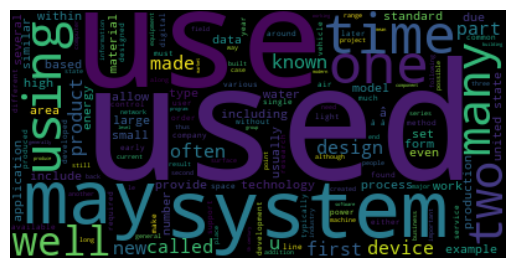

In [44]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız

### Adım 1: Metin ön işleme işlemlerini gerçekleştiriniz

In [45]:
def text_preprocessing(dataframe, col_name, language = "english", word_threshold = 1000, plot = False, plot_word_threshold = 3000,word_cloud = False):
    dataframe[col_name] = dataframe[col_name].str.lower()
    dataframe[col_name] = dataframe[col_name].str.replace("[^\w\s]","")
    dataframe[col_name] = dataframe[col_name].str.replace("\d", "")
    sw = stopwords.words(language)
    dataframe[col_name] = dataframe[col_name].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    temp_df = pd.Series(" ".join(dataframe[col_name]).split()).value_counts()
    drops = temp_df[temp_df < word_threshold]
    dataframe[col_name] = dataframe[col_name].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
    dataframe[col_name] = dataframe[col_name].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    if plot == True:
        tf = dataframe[col_name].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
        tf.columns = ["words", "tf"]
        tf[tf["tf"] > plot_word_threshold].plot.bar(x="words", y="tf")
        plt.show()
        
    if word_cloud == True:
        text = " ".join(i for i in df.text)
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    
    
    return dataframe

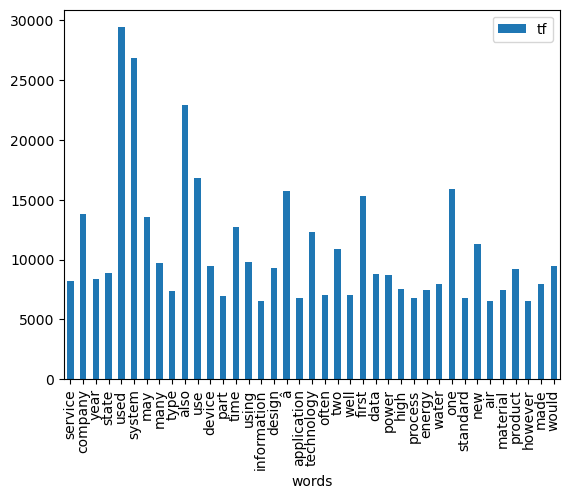

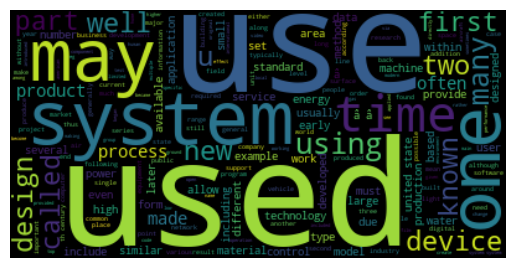

In [49]:
df = text_preprocessing(df, "text", word_threshold = 2000, plot = True, plot_word_threshold=6500, word_cloud=True)

In [50]:
df

text
0      computer service company based founded public ...
1      also known device information usually state im...
2      â â circuit design technical designed several ...
3      became part allows access ground used u data d...
4      used lower light form used light device usuall...
...                                                  ...
10854  company technology commercial company system a...
10855  signal frequency within frequency range use po...
10856  technology technology term used national techn...
10857  network network usually system information dat...
10858  case case part multiple vehicle case power mea...

[10859 rows x 1 columns]